In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import open3d as o3d
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


In [3]:
attr = ['x','y', 'z', 'nx','ny', 'nz', 'diffuse_red', 'diffuse_green', 'diffuse_blue', 'class', 'detection']

In [4]:
path = "./ply/albert.ply"
pd1 = np.loadtxt(path, delimiter=" ", skiprows=15)
df = pd.DataFrame(pd1)
df.columns = attr

In [5]:
df

,x,y,z,nx,ny,nz,diffuse_red,diffuse_green,diffuse_blue,class,detection
0,1.0582,2.2025,1.4718,0.401,-0.622,0.672,91.0,83.0,63.0,0.0,0.0
1,1.3468,2.1444,1.3478,-0.489,-0.860,-0.148,10.0,12.0,5.0,0.0,0.0
2,1.5103,2.1191,1.2841,-0.226,-0.915,-0.335,26.0,24.0,9.0,0.0,0.0
3,1.5148,2.1294,1.2918,0.114,-0.577,-0.809,27.0,24.0,10.0,0.0,0.0
4,1.5179,2.1304,1.2918,0.158,-0.625,-0.764,41.0,35.0,23.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
354650,2.5602,3.0958,-2.8950,-0.683,0.341,-0.646,14.0,26.0,6.0,0.0,0.0
354651,2.6539,3.1113,-2.9401,-0.948,0.283,-0.144,31.0,40.0,19.0,0.0,0.0
354652,2.6503,3.1019,-2.9365,-0.959,0.243,-0.145,43.0,47.0,24.0,0.0,0.0
354653,2.7923,3.3096,-3.0490,-0.794,0.380,-0.475,21.0,30.0,25.0,0.0,0.0


## show some points where the y threshold is set to some num

min @ idx 332604 is 1.2873
max @ idx 192325 is 16.857


(array([3.50300e+04, 2.07383e+05, 1.09060e+04, 2.02400e+03, 9.36000e+02,
        6.14000e+02, 5.70900e+03, 1.61580e+04, 2.61900e+03, 5.50300e+03,
        6.32700e+03, 1.83300e+04, 1.89290e+04, 1.54320e+04, 6.54700e+03,
        2.17500e+03, 3.30000e+01]),
 array([ 1.2873    ,  2.20316471,  3.11902941,  4.03489412,  4.95075882,
         5.86662353,  6.78248824,  7.69835294,  8.61421765,  9.53008235,
        10.44594706, 11.36181176, 12.27767647, 13.19354118, 14.10940588,
        15.02527059, 15.94113529, 16.857     ]),
 <a list of 17 Patch objects>)

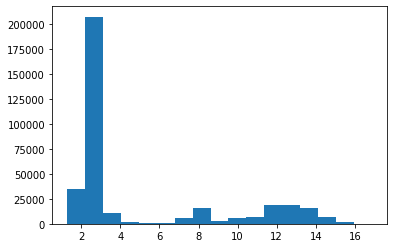

In [6]:
# range of y values
y_vals = df.iloc[:,1]
print(f"min @ idx {y_vals.idxmin()} is {y_vals[y_vals.idxmin()]}")
print(f"max @ idx {y_vals.idxmax()} is {y_vals[y_vals.idxmax()]}")
plt.hist(y_vals, bins = 17)

In [7]:
ythresh = 3
mask = df['y'] < ythresh
df1 = df.loc[mask]
print(f"num pts of just albert {len(df1)}")

num pts of just albert 235031


In [8]:
def write_ply(filename, df):
    header = f'''ply 
    format ascii 1.0
    element vertex {len(df)}
    property float x
    property float y
    property float z
    property float nx
    property float ny
    property float nz
    property uchar diffuse_red
    property uchar diffuse_green
    property uchar diffuse_blue
    property uchar class
    property uchar detection
    end_header
    '''
    with open(filename, "w+") as p:
        p.write(header)
        for i in df1.iterrows():
            p.write(f"{i[1]['x']} {i[1]['y']} {i[1]['z']} {i[1]['nx']} {i[1]['ny']} {i[1]['nz']} {int(i[1]['diffuse_red'])} {int(i[1]['diffuse_green'])} {int(i[1]['diffuse_blue'])} {int(i[1]['class'])} {int(i[1]['detection'])} \n")

In [9]:
write_ply("./ply/just_albert.ply", df1)

In [17]:
# Load saved point cloud and visualize it
pcd_load = o3d.io.read_point_cloud("./ply/just_albert.ply")
# mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame()
o3d.visualization.draw_geometries([pcd_load])

# now try to overlay the pts on the image

size (4032, 3024, 3) picture


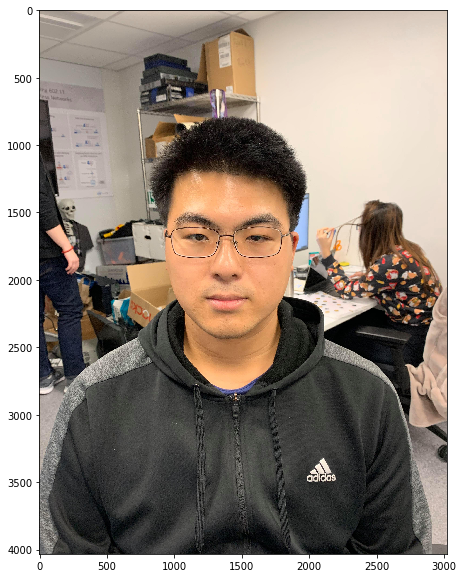

In [11]:
img=mpimg.imread('./ply/albert.jpg')

plt.figure(figsize=(10,10))
plt.imshow(img)

print(f"size {img.shape} picture")

In [12]:
# so now I scale everything to match the image size

In [13]:

x_min, x_max = min(df1['x']), max(df1['x'])
z_min, z_max = min(df1['z']), max(df1['z'])
print(f"x scale range {x_min}, {x_max}, {x_max-x_min}, to {img.shape[1]}")
print(f"z scale range {z_min}, {z_max}, {z_max-z_min}, to {img.shape[0]}")

x scale range -0.4514, 4.0943, 4.5457, to 3024
z scale range -2.7615, 2.3351, 5.0966000000000005, to 4032


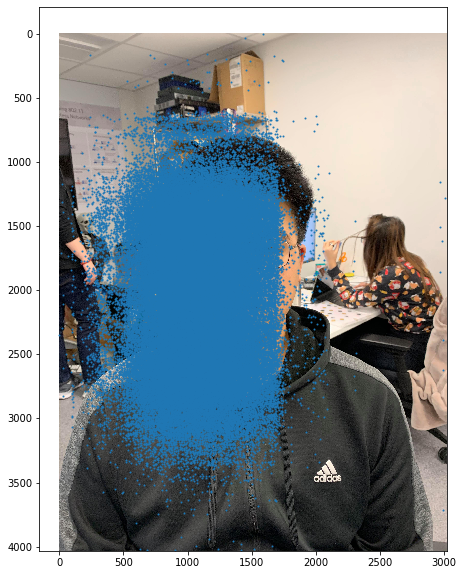

In [39]:
n_samples = 100000
indexs = np.random 
x_trans = np.random.choice(np.interp(df1['x'], (x_min, x_max), (0, img.shape[1])), size=n_samples)
y_trans = np.random.choice(np.interp(df1['z'], (z_min, z_max), (0, img.shape[0])), size=n_samples)
# x_trans = np.interp(df1['x'], (x_min, x_max), (0, img.shape[1]))
# y_trans = np.interp(df1['z'], (z_min, z_max), (0, img.shape[0]))
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.scatter(x_trans, y_trans, s=1)

AttributeError: 'Axes3DSubplot' object has no attribute 'view'

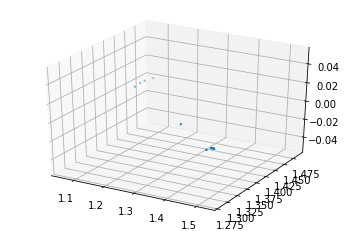

In [29]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure()
ax = plt.axes(projection='3d')
plt.scatter(df1['x'][:10], df1['z'][:10], df1['y'][:10])
ax.view(0,0)